## IMPORTING LIBRARIES

In [56]:
## Importing libraries for loading and processing
import pandas as pd
import numpy as np

## visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

## building validation framework
from sklearn.model_selection import train_test_split

## Categorical encoding
from sklearn .feature_extraction import DictVectorizer

## regression model
from sklearn.linear_model import LinearRegression

## metrics
from sklearn.metrics import root_mean_squared_error

## Loading Data and Overview

In [2]:
## Loading the Data
data = pd.read_csv("Datasets/car_price_datatset.csv")

In [3]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df = data.copy()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Understanding the Dataset

In [5]:
## Checking for rows and column
r = df.shape[0]
c = df.shape[1]
print(f"Total Rows:{r}\nTotal Columns {c}")

Total Rows:11914
Total Columns 16


In [6]:
df.duplicated().sum()

np.int64(715)

In [7]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [9]:
for each_name in df.columns:
    print(each_name)
    print(df[each_name].unique())

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '62

## Data Preprocessing
- Normalize Column names
- replacing unusual characters with NAN Values
- Normalizing column names
- Filling of missing of values

In [10]:
## Normalize Column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [11]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Normalizing the column types

In [13]:
df["make"] = df["make"].astype("category")

In [14]:
df["model"] = df["model"].astype("category")

In [15]:
df["engine_fuel_type"] = df["engine_fuel_type"].astype("category")

In [16]:
df["transmission_type"] = df["transmission_type"].astype("category")

In [17]:
df["driven_wheels"] = df["driven_wheels"].astype("category")

In [18]:
df["engine_cylinders"] = df["market_category"].astype("category")

In [19]:
df["vehicle_size"] = df["vehicle_size"].astype("category")

In [20]:
df["vehicle_style"] = df["market_category"].astype("category")

In [21]:
df["number_of_doors"] = df["number_of_doors"].astype("category")

In [22]:
df.dtypes

make                 category
model                category
year                    int64
engine_fuel_type     category
engine_hp             float64
engine_cylinders     category
transmission_type    category
driven_wheels        category
number_of_doors      category
market_category        object
vehicle_size         category
vehicle_style        category
highway_mpg             int64
city_mpg                int64
popularity              int64
msrp                    int64
dtype: object

In [23]:
## Filling the missing values
df["engine_hp"] = df["engine_hp"].fillna(df["engine_hp"].mean().round())

In [24]:
df["engine_cylinders"] = df["engine_cylinders"].fillna(df["engine_cylinders"].value_counts().index[0])

In [25]:
df["number_of_doors"] = df["number_of_doors"].fillna(df["number_of_doors"].value_counts().index[0])

In [26]:
df["engine_fuel_type"] = df["engine_fuel_type"].fillna(df["engine_fuel_type"].value_counts().index[0])

In [27]:
df["market_category"] = df["market_category"].fillna(df["market_category"].value_counts().index[0])

In [28]:
df["vehicle_style"] = df["vehicle_style"].fillna(df["vehicle_style"].value_counts().index[0])

In [29]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

## Descriptive Analysis

In [30]:
## Satistical Summary
df.describe().round()

,year,engine_hp,highway_mpg,city_mpg,popularity,msrp
count,11914.0,11914.0,11914.0,11914.0,11914.0,11914.0
mean,2010.0,249.0,27.0,20.0,1555.0,40595.0
std,8.0,109.0,9.0,9.0,1442.0,60109.0
min,1990.0,55.0,12.0,7.0,2.0,2000.0
25%,2007.0,170.0,22.0,16.0,549.0,21000.0
50%,2015.0,227.0,26.0,18.0,1385.0,29995.0
75%,2016.0,300.0,30.0,22.0,2009.0,42231.0
max,2017.0,1001.0,354.0,137.0,5657.0,2065902.0


In [31]:
del df['year']

In [32]:
df.describe().round()

,engine_hp,highway_mpg,city_mpg,popularity,msrp
count,11914.0,11914.0,11914.0,11914.0,11914.0
mean,249.0,27.0,20.0,1555.0,40595.0
std,109.0,9.0,9.0,1442.0,60109.0
min,55.0,12.0,7.0,2.0,2000.0
25%,170.0,22.0,16.0,549.0,21000.0
50%,227.0,26.0,18.0,1385.0,29995.0
75%,300.0,30.0,22.0,2009.0,42231.0
max,1001.0,354.0,137.0,5657.0,2065902.0


In [33]:
numerical_cols = df.select_dtypes(include=['int', 'float'])

corr_matrix = numerical_cols.corr()

corr_matrix['msrp']

engine_hp      0.661641
highway_mpg   -0.160043
city_mpg      -0.157676
popularity    -0.048476
msrp           1.000000
Name: msrp, dtype: float64

## Exploratory Data Analysis
- Target variable analysis
- Plot a coorelation againts the target variable
- Outlier analysis

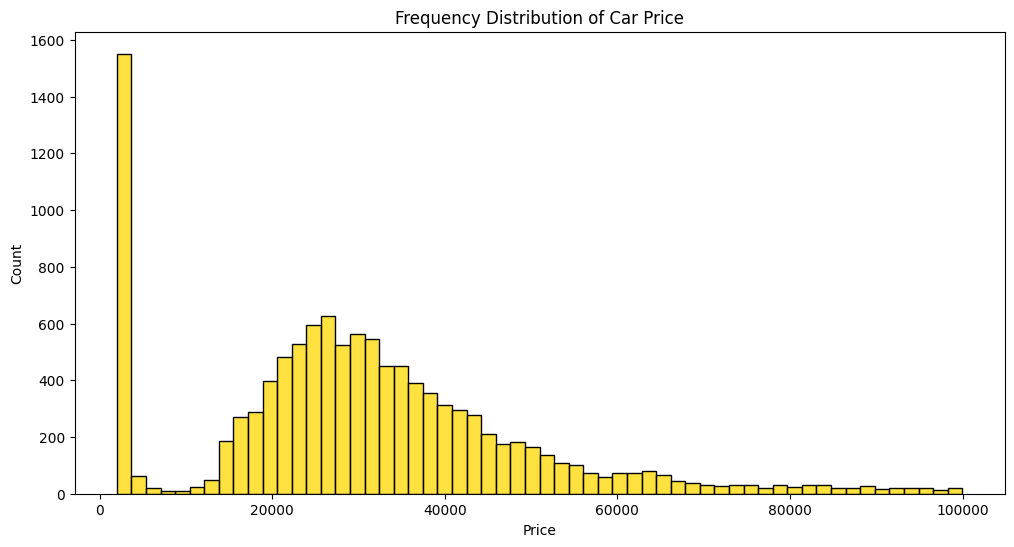

In [34]:
plt.figure(figsize = (12,6))

plt.title("Frequency Distribution of Car Price")
plt.xlabel("Price")
plt.ylabel("Count")
sns.histplot(df["msrp"][df["msrp"] < 100000], color = 'gold')
plt.show()

In [35]:
## Using the log Transformation to normalize the distribution table
log_price = np.log1p(df['msrp'])

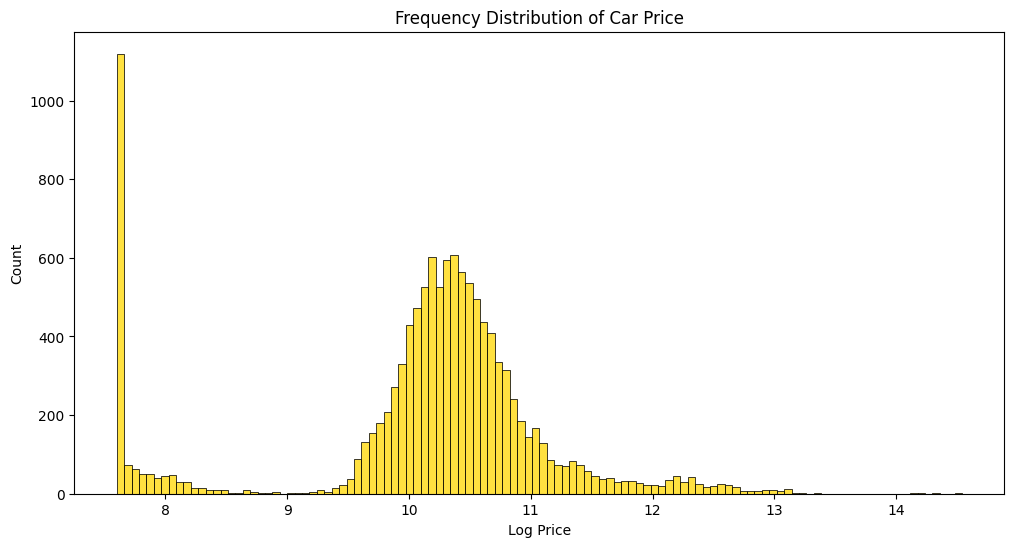

In [36]:
plt.figure(figsize = (12,6))

plt.title("Frequency Distribution of Car Price")
plt.xlabel("Log Price")
plt.ylabel("Count")
sns.histplot(log_price, color = 'gold')
plt.show()

## Building A Validation Framework
- Training Dataset 60%
- Validation Dataset 20%
- Testing Dataset 20%

In [37]:
df_train_full, df_test = train_test_split(df,test_size = 0.2, random_state=11) 
## the df_train_full is the full dataset we are training. we assign 80% to it and it is a variable. 
## we set another variable df_test
df_train, df_valid = train_test_split(df_train_full, test_size = 0.25, random_state = 11)

print(f'Size of Training Dataset: {len(df_train)}')
print(f'Size of Validation Dataset: {len(df_valid)}')
print(f'Size of Testing Dataset: {len(df_test)}')

Size of Training Dataset: 7148
Size of Validation Dataset: 2383
Size of Testing Dataset: 2383


In [38]:
## Actual Predicitions
y_train = df_train['msrp']
y_valid = df_valid['msrp']
y_test= df_test['msrp']

In [39]:
df_train

,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
579,FIAT,500L,premium unleaded (recommended),160.0,Crossover,MANUAL,front wheel drive,4.0,Crossover,Compact,Crossover,33,25,819,19495
732,BMW,7 Series,premium unleaded (required),445.0,"Luxury,High-Performance",AUTOMATIC,rear wheel drive,4.0,"Luxury,High-Performance",Large,"Luxury,High-Performance",26,17,3916,94600
8729,Chevrolet,S-10 Blazer,regular unleaded,165.0,Crossover,MANUAL,rear wheel drive,2.0,Crossover,Compact,Crossover,22,16,1385,2000
11781,Cadillac,XTS,regular unleaded,304.0,"Luxury,Performance",AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Large,"Luxury,Performance",28,18,1624,64550
5177,Pontiac,G5,regular unleaded,148.0,Crossover,MANUAL,front wheel drive,2.0,Crossover,Compact,Crossover,33,24,210,15675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,Chevrolet,City Express,regular unleaded,131.0,Crossover,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,Crossover,26,24,1385,23515
3424,Dodge,Dakota,regular unleaded,210.0,Crossover,AUTOMATIC,four wheel drive,4.0,Crossover,Compact,Crossover,18,14,1851,26280
11299,Hyundai,Veracruz,regular unleaded,260.0,Crossover,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,Crossover,22,17,1439,28345
10625,Chevrolet,TrailBlazer,premium unleaded (required),390.0,"Factory Tuner,Performance",AUTOMATIC,all wheel drive,4.0,"Factory Tuner,Performance",Midsize,"Factory Tuner,Performance",16,12,1385,37725


In [40]:
## Deleting the target column
df_train= df_train.drop("msrp", axis = 1)
df_valid= df_valid.drop("msrp", axis = 1)
df_test= df_test.drop("msrp", axis = 1)

In [41]:
df_train

,make,model,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
579,FIAT,500L,premium unleaded (recommended),160.0,Crossover,MANUAL,front wheel drive,4.0,Crossover,Compact,Crossover,33,25,819
732,BMW,7 Series,premium unleaded (required),445.0,"Luxury,High-Performance",AUTOMATIC,rear wheel drive,4.0,"Luxury,High-Performance",Large,"Luxury,High-Performance",26,17,3916
8729,Chevrolet,S-10 Blazer,regular unleaded,165.0,Crossover,MANUAL,rear wheel drive,2.0,Crossover,Compact,Crossover,22,16,1385
11781,Cadillac,XTS,regular unleaded,304.0,"Luxury,Performance",AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Large,"Luxury,Performance",28,18,1624
5177,Pontiac,G5,regular unleaded,148.0,Crossover,MANUAL,front wheel drive,2.0,Crossover,Compact,Crossover,33,24,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,Chevrolet,City Express,regular unleaded,131.0,Crossover,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,Crossover,26,24,1385
3424,Dodge,Dakota,regular unleaded,210.0,Crossover,AUTOMATIC,four wheel drive,4.0,Crossover,Compact,Crossover,18,14,1851
11299,Hyundai,Veracruz,regular unleaded,260.0,Crossover,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,Crossover,22,17,1439
10625,Chevrolet,TrailBlazer,premium unleaded (required),390.0,"Factory Tuner,Performance",AUTOMATIC,all wheel drive,4.0,"Factory Tuner,Performance",Midsize,"Factory Tuner,Performance",16,12,1385


In [ ]:
## select the cols with int and float
df_train_bl = df_train.select

## Data Preprocessing 2

In [42]:
## Converting dataframe to a vector
y_train = np.log1p(y_train).values 
y_valid = np.log1p(y_valid).values 
y_test = np.log1p(y_test).values

In [43]:
y_train

array([ 9.8779646 , 11.45742333,  7.60140233, ..., 10.25224121,
       10.53810479, 10.82418854])

In [44]:

## Converting dataframe to matrix format / numpy array / 
X_train = df_train.select_dtypes(include=['int','float'])
X_valid = df_valid.select_dtypes(include=['int','float'])
X_test = df_test.select_dtypes(include=['int','float'])

In [45]:
X_train

,engine_hp,highway_mpg,city_mpg,popularity
579,160.0,33,25,819
732,445.0,26,17,3916
8729,165.0,22,16,1385
11781,304.0,28,18,1624
5177,148.0,33,24,210
...,...,...,...,...
2524,131.0,26,24,1385
3424,210.0,18,14,1851
11299,260.0,22,17,1439
10625,390.0,16,12,1385


In [46]:
## Converting dataframe to matrix format / numpy array
X_train = df_train.select_dtypes(include=['int','float']).values
X_valid = df_valid.select_dtypes(include=['int','float']).values
X_test = df_test.select_dtypes(include=['int','float']).values

In [47]:
X_train

array([[ 160.,   33.,   25.,  819.],
       [ 445.,   26.,   17., 3916.],
       [ 165.,   22.,   16., 1385.],
       ...,
       [ 260.,   22.,   17., 1439.],
       [ 390.,   16.,   12., 1385.],
       [ 270.,   26.,   18.,  454.]])

## Training a Baseline Linear Regression

In [48]:
## creating an instance of regression
lr_model = LinearRegression() 

## fit the data to model 
lr_model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [49]:
## generation a validation prediction for validation set
y_valid_pred = lr_model.predict(X_valid) ## the y_valid_pred takes the original y_valid to compare their values for accuracy

In [50]:
y_valid_pred

array([ 9.94890145, 10.5317317 , 10.36452967, ..., 11.29070427,
       10.18957407,  9.82002991])

In [51]:
## measure the accuracy
rmse = root_mean_squared_error(y_valid, y_valid_pred)
print(f' Baseline Validation Metrix: {round(rmse, 2) * 100} %')

Validation Accuracy: 77.0 %


## Feature Engineering 
- select two categorical cols: year, transmission_type

In [62]:
## craete a newlist of the col names
cat_fe_1 = ['engine_cylinders', 'transmission_type']
numerical_cols = ['engine_hp', 'city_mpg', 'popularity', 'highway_mpg']
df_train_fe_1 = df_train[numerical_cols + cat_fe_1]
df_valid_fe_1 = df_valid[numerical_cols + cat_fe_1]
df_train_fe_1
df_valid_fe_1

,engine_hp,city_mpg,popularity,highway_mpg,engine_cylinders,transmission_type
6562,268.0,12,454,15,Luxury,AUTOMATIC
6298,304.0,17,155,26,"Flex Fuel,Performance",AUTOMATIC
10989,310.0,15,2031,19,Crossover,AUTOMATIC
5926,170.0,22,204,28,"Luxury,Performance",MANUAL
6934,249.0,101,1391,107,"Exotic,Performance",DIRECT_DRIVE
...,...,...,...,...,...,...
8899,302.0,22,870,31,"Luxury,High-Performance",AUTOMATIC
4019,300.0,15,549,21,Crossover,AUTOMATIC
957,400.0,19,1715,27,"Luxury,High-Performance",MANUAL
127,240.0,22,3916,34,"Hatchback,Luxury",AUTOMATIC


In [63]:
## convert our dataframes to a dictionary
dict_train_fe_1 = df_train_fe_1.to_dict(orient='records')
dict_valid_fe_1 = df_valid_fe_1.to_dict(orient='records')

In [59]:
## create an instance 
dv = DictVectorizer(sparse = False)

dv.fit(dict_train_fe_1)

DictVectorizer(sparse=False)

In [65]:
## Generate newset of Data
X_train_fe_1 = dv.transform(dict_train_fe_1)
X_valid_fe_1 = dv.transform(dict_valid_fe_1)
X_train_fe_1

array([[25.,  1.,  0., ...,  0.,  1.,  0.],
       [17.,  0.,  0., ...,  0.,  0.,  0.],
       [16.,  1.,  0., ...,  0.,  1.,  0.],
       ...,
       [17.,  1.,  0., ...,  0.,  0.,  0.],
       [12.,  0.,  0., ...,  0.,  0.,  0.],
       [18.,  0.,  0., ...,  0.,  0.,  0.]])

## Train Fe_1 Model

In [66]:
lr_fe_1_model = LinearRegression()

lr_fe_1_model.fit(X_train_fe_1,y_train)

LinearRegression()

In [67]:
y_valid_pred_fe_1 = lr_fe_1_model.predict(X_valid_fe_1)

In [69]:
rmse_fe_1 = root_mean_squared_error(y_valid, y_valid_pred_fe_1)

print(f'Log Reg Validation Metrix for Fe_1: :{round(rmse_fe_1,2) * 100} %')

Log Reg Validation Metrix for Fe_1: :67.0 %


## Feature Engineering 2
- Select 2 categorical cols: engine_fuel_type, driven_wheels


In [77]:
cat_fe_2 = ['engine_fuel_type', 'driven_wheels']
numerical_cols = ['engine_hp', 'city_mpg', 'popularity', 'highway_mpg',	'engine_cylinders', 'transmission_type']

df_train_fe_2 = df_train[numerical_cols + cat_fe_2]
df_valid_fe_2 = df_valid[numerical_cols + cat_fe_2]

df_train_fe_2
df_valid_fe_2

,engine_hp,city_mpg,popularity,highway_mpg,engine_cylinders,transmission_type,engine_fuel_type,driven_wheels
6562,268.0,12,454,15,Luxury,AUTOMATIC,regular unleaded,four wheel drive
6298,304.0,17,155,26,"Flex Fuel,Performance",AUTOMATIC,flex-fuel (unleaded/E85),all wheel drive
10989,310.0,15,2031,19,Crossover,AUTOMATIC,regular unleaded,rear wheel drive
5926,170.0,22,204,28,"Luxury,Performance",MANUAL,regular unleaded,front wheel drive
6934,249.0,101,1391,107,"Exotic,Performance",DIRECT_DRIVE,electric,all wheel drive
...,...,...,...,...,...,...,...,...
8899,302.0,22,870,31,"Luxury,High-Performance",AUTOMATIC,regular unleaded,all wheel drive
4019,300.0,15,549,21,Crossover,AUTOMATIC,regular unleaded,rear wheel drive
957,400.0,19,1715,27,"Luxury,High-Performance",MANUAL,premium unleaded (required),rear wheel drive
127,240.0,22,3916,34,"Hatchback,Luxury",AUTOMATIC,premium unleaded (required),all wheel drive


In [78]:
## Convert the dataframe to dictionary
df_train_fe_2 = df_train_fe_2.to_dict(orient = 'records')
df_valid_fe_2 = df_valid_fe_2.to_dict(orient = 'records')

In [81]:
## create an instance
dv = DictVectorizer(sparse = False)
dv.fit(df_train_fe_2)

DictVectorizer(sparse=False)

In [82]:
## Generate newset of Data
X_train_fe_2 = dv.transform(df_train_fe_2)
X_valid_fe_2 = dv.transform(df_valid_fe_2)

X_valid_fe_2

array([[12.,  0.,  1., ...,  0.,  0.,  0.],
       [17.,  1.,  0., ...,  0.,  0.,  0.],
       [15.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [19.,  0.,  0., ...,  0.,  1.,  0.],
       [22.,  1.,  0., ...,  0.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0.,  0.]])

## Train Fe_2 Model

In [83]:
lr_fe_2_model = LinearRegression()
lr_fe_2_model.fit(X_train_fe_2,y_train)

LinearRegression()

In [85]:
y_valid_pred_fe_2 = lr_fe_2_model.predict(X_valid_fe_2)

In [86]:
rmse_fe_2 = root_mean_squared_error(y_valid, y_valid_pred_fe_2)

print(f'Log Reg Validation Metrix for Fe_2: :{round(rmse_fe_2,2) * 100} %')

Log Reg Validation Metrix for Fe_2: :64.0 %


## Train the Final Model